## @author - Pardeep
## transfer learning model using MobileNetV2 which is already trained over dataset images
### reference :- https://keras.io/api/applications/mobilenet/#mobilenetv2-function

# Data Preprocessing

In [1]:
from keras.preprocessing.image import ImageDataGenerator

### Preprocessing the Training set

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   featurewise_center=False,
                                   rotation_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   brightness_range=(0.2,1.0),
                                   channel_shift_range=0.2,
                                   fill_mode="nearest",
                                   vertical_flip=True,)
training_set = train_datagen.flow_from_directory(r'C:\Users\parde\Downloads\Mixed Images\Google images only\Segmented Medicinal Leaf Images',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 122 images belonging to 30 classes.


### Preprocessing the Test set (contains random images only)

In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(r'C:\Users\parde\Downloads\Mixed Images\5 images from dataset and other from google/Data\Google images only',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 122 images belonging to 30 classes.


### Preprocessing the test set (contains dataset images only)

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
val_set = test_datagen.flow_from_directory(r'C:\Users\parde\Downloads\Mixed Images\5 images from dataset and other from google\Data\Dataset images only',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 150 images belonging to 30 classes.


# importing transfer learning model

In [5]:
import tensorflow as tf
from keras.models import load_model

In [6]:
model = tf.keras.models.load_model("mobilenetv2.h5")

# preprocessing pre trained model

In [7]:
for layer in model.layers:
    layer.trainable = False

# Training the transfer learning model

### Compiling the CNN

In [8]:
model.compile(optimizer = 'adam', loss = 'CategoricalCrossentropy', metrics = ['accuracy'])

### To avoid model to overfitting 

In [9]:
from keras.callbacks import EarlyStopping

In [10]:
earlystop = EarlyStopping(monitor='accuracy', patience=3, verbose=2)

### Training the CNN on the Training set and evaluating it on the Test set

In [11]:
STEP_SIZE_TRAIN=training_set.n//training_set.batch_size

In [12]:
a= model.fit(training_set, steps_per_epoch=STEP_SIZE_TRAIN, callbacks= earlystop,epochs = 50)

Epoch 1/50
3/3 [==============================] - 5s 741ms/step - loss: 36.3628 - accuracy: 0.1235
Epoch 2/50
3/3 [==============================] - 3s 820ms/step - loss: 35.1047 - accuracy: 0.1055
Epoch 3/50
3/3 [==============================] - 2s 726ms/step - loss: 35.6765 - accuracy: 0.1109
Epoch 4/50
3/3 [==============================] - 3s 1s/step - loss: 37.6197 - accuracy: 0.0846
Epoch 00004: early stopping


### accuracy and losses

### Accuracy Over Random google images

In [13]:
test_loss, test_acc =model.evaluate(test_set)
print("Accuracy on google images: ",test_acc)

4/4 [==============================] - 3s 615ms/step - loss: 32.1839 - accuracy: 0.1393
Accuracy on google images:  0.13934426009655


### Accuracy Over Dataset Images

In [14]:
print("loss on google images: ",test_loss)

loss on google images:  32.18390655517578


In [15]:
test_loss, test_acc =model.evaluate(val_set)
print("Accuracy on Dataset images: ",test_acc)

5/5 [==============================] - 4s 771ms/step - loss: 0.1029 - accuracy: 0.9667
Accuracy on Dataset images:  0.9666666388511658


In [16]:
print("loss on Dataset images: ",test_loss)

loss on Dataset images:  0.10294465720653534


In [17]:
import matplotlib.pyplot as plt

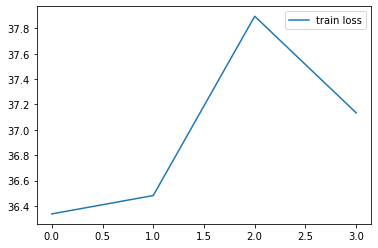

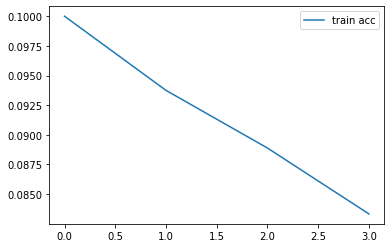

In [18]:
# plot the loss
plt.plot(a.history['loss'], label='train loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(a.history['accuracy'], label='train acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

## saving a model

In [19]:
import tensorflow as tf

from keras.models import load_model

model.save('4limiteddatamobilenetv2.h5')

# Added google images to model which is already trained over Dataset

# Single Prediction

In [20]:
from tensorflow import keras
import tensorflow as tf

In [21]:
img = keras.preprocessing.image.load_img(
    r"C:\Users\parde\Downloads\Project Workspace\Segmented Medicinal Leaf Images\Brassica Juncea (Indian Mustard)\BJ-S-029.jpg", target_size=(224,224,3)
)
img_array = keras.preprocessing.image.img_to_array(img)/255
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
result = predictions[0]

In [22]:

if result[0] == result.max():
  prediction = 'Alpinia Galanga (Rasna)'
elif result[1] == result.max():
    prediction = 'Amaranthus Viridis (Arive-Dantu)'
elif result[2] == result.max():
    prediction = 'Artocarpus Heterophyllus (Jackfruit)'
elif result[3] == result.max():
    prediction = 'Azadirachta Indica (Neem)'
elif result[4] == result.max():
    prediction = 'Basella Alba (Basale)'
elif result[5] == result.max():
    prediction = 'Brassica Juncea (Indian Mustard)'
elif result[6] == result.max():
    prediction = 'Carissa Carandas (Karanda)'
elif result[7] == result.max():
    prediction = 'Citrus Limon (Lemon)'
elif result[8] == result.max():
    prediction = 'Ficus Auriculata (Roxburgh fig)'
elif result[9] == result.max():
    prediction = 'Ficus Religiosa (Peepal Tree)'
elif result[10] == result.max():
    prediction = 'Hibiscus Rosa-sinensis'
elif result[11] == result.max():
    prediction = 'Jasminum (Jasmine)'
elif result[12] == result.max():
    prediction = 'Mangifera Indica (Mango)'
elif result[12] == result.max():
    prediction = 'Mentha (Mint)'
elif result[14] == result.max():
    prediction = 'Moringa Oleifera (Drumstick)'
elif result[15] == result.max():
    prediction = 'Muntingia Calabura (Jamaica Cherry-Gasagase)'
elif result[16] == result.max():
    prediction = 'Murraya Koenigii (Curry)'
elif result[17] == result.max():
    prediction = 'Nerium Oleander (Oleander)'
elif result[18] == result.max():
    prediction = 'Nyctanthes Arbor-tristis (Parijata)'
elif result[19] == result.max():
    prediction = 'Ocimum Tenuiflorum (Tulsi)'
elif result[20] == result.max():
    prediction = 'Piper Betle (Betel)'
elif result[21] == result.max():
    prediction = 'Plectranthus Amboinicus (Mexican Mint)'
elif result[22] == result.max():
    prediction = 'Pongamia Pinnata (Indian Beech)'
elif result[23] == result.max():
    prediction = 'Psidium Guajava (Guava)'
elif result[24] == result.max():
    prediction = 'Punica Granatum (Pomegranate)'
elif result[25] == result.max():
    prediction = 'Santalum Album (Sandalwood)'
elif result[26] == result.max():
    prediction = 'Syzygium Cumini (Jamun)'
elif result[27] == result.max():
    prediction = 'Syzygium Jambos (Rose Apple)'
elif result[28] == result.max():
    prediction = 'Tabernaemontana Divaricata (Crape Jasmine)'
else:
    prediction = 'Trigonella Foenum-graecum (Fenugreek)'

In [23]:
print(prediction)


Brassica Juncea (Indian Mustard)
